### MACHINE LEARNING: MODELO DE PREDIÇÃO DE FRAUDES 
Vamos utilizar algumas bibliotecas prontas para Padronização, Normalização e Criação de modelos de predição com Python.

In [2]:
#Importando bibliotecas:

import pandas as pd
import numpy as np
import warnings
import seaborn as sbn
import matplotlib.pyplot as plt
import time


from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from imblearn import over_sampling, under_sampling
from sklearn.metrics import r2_score
from imblearn.over_sampling import SMOTE

# IMPORTAÇÃO E ANÁLISES DO CONJUNTO DE DADOS

In [3]:
dados_original = pd.read_csv("dataset_10k.csv")

pd.options.display.float_format = "{:.2f}".format

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

warnings.filterwarnings("ignore")

In [4]:
dados_original.head()

,Contrato,Idade,Sexo,Valor_Renda,UF_Cliente,Perc_Juros,Prazo_Emprestimo,Data_Contratacao,Prazo_Restante,VL_Emprestimo,VL_Emprestimo_ComJuros,QT_Total_Parcelas_Pagas,QT_Total_Parcelas_Pagas_EmDia,QT_Total_Parcelas_Pagas_EmAtraso,Qt_Renegociacao,Estado_Civil,Escolaridade,Possui_Patrimonio,VL_Patrimonio,QT_Parcelas_Atraso,QT_Dias_Atraso,Saldo_Devedor,Total_Pago,Possivel_Fraude
0,322068935715,43,M,5800.00,SP,23.00,200,2022-08-01,193,80000.00,92000.00,15,9,1,0,DIVORCIADO,Nenhum,N,0.00,0,NaN,91759.97,7717.08,Nao
1,322068936715,22,M,2000.00,MG,20.00,100,2022-08-01,89,50000.00,57500.00,10,10,0,0,SOLTEIRO(A),NaN,N,0.00,4,103.00,53981.18,6756.59,Nao
2,322068938715,35,M,4000.00,BA,18.00,100,2022-08-01,85,100000.00,115000.00,15,5,1,0,CASADO (A),NaN,N,0.00,0,NaN,101150.02,17929.06,Nao
3,322068939715,20,M,1800.00,MG,20.00,100,2022-08-01,89,30000.00,34500.00,1,1,0,0,SOLTEIRO(A),NaN,N,0.00,13,376.00,36208.10,369.10,Sim
4,322068940715,53,M,2800.00,MG,20.00,100,2022-08-01,87,60000.00,69000.00,16,16,0,0,CASADO (A),NaN,N,0.00,0,NaN,60984.00,11845.24,Nao


In [5]:
dados_original.shape

(9517, 24)

In [6]:
inicio = pd.to_datetime(dados_original["Data_Contratacao"]).dt.date.min()
fim = pd.to_datetime(dados_original["Data_Contratacao"]).dt.date.max()

print("Período dos dados analizados:\n - De", inicio, " - Até ", fim)

Período dos dados analizados:
 - De 2022-07-04  - Até  2022-12-20


In [7]:
dados_original.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9517 entries, 0 to 9516
Data columns (total 24 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Contrato                          9517 non-null   int64  
 1   Idade                             9517 non-null   int64  
 2   Sexo                              9517 non-null   object 
 3   Valor_Renda                       9517 non-null   float64
 4   UF_Cliente                        9517 non-null   object 
 5   Perc_Juros                        9517 non-null   float64
 6   Prazo_Emprestimo                  9517 non-null   int64  
 7   Data_Contratacao                  9517 non-null   object 
 8   Prazo_Restante                    9517 non-null   int64  
 9   VL_Emprestimo                     9517 non-null   float64
 10  VL_Emprestimo_ComJuros            9517 non-null   float64
 11  QT_Total_Parcelas_Pagas           9517 non-null   int64  
 12  QT_Tot

## Guardando os valores únicos de cada tabela

In [8]:
valores_unicos = []

for i in dados_original.columns[0:24].to_list():
    print(i, ":", len(dados_original[i].astype(str).value_counts()))
    valores_unicos.append(len(dados_original[i].astype(str).value_counts()))

Contrato : 9517
Idade : 74
Sexo : 2
Valor_Renda : 855
UF_Cliente : 27
Perc_Juros : 21
Prazo_Emprestimo : 36
Data_Contratacao : 110
Prazo_Restante : 79
VL_Emprestimo : 61
VL_Emprestimo_ComJuros : 61
QT_Total_Parcelas_Pagas : 24
QT_Total_Parcelas_Pagas_EmDia : 24
QT_Total_Parcelas_Pagas_EmAtraso : 15
Qt_Renegociacao : 10
Estado_Civil : 6
Escolaridade : 6
Possui_Patrimonio : 2


VL_Patrimonio : 3
QT_Parcelas_Atraso : 16
QT_Dias_Atraso : 16
Saldo_Devedor : 7654
Total_Pago : 7022
Possivel_Fraude : 2


## Análises de dados numéricos

In [9]:
dados_original.describe()

,Contrato,Idade,Valor_Renda,Perc_Juros,Prazo_Emprestimo,Prazo_Restante,VL_Emprestimo,VL_Emprestimo_ComJuros,QT_Total_Parcelas_Pagas,QT_Total_Parcelas_Pagas_EmDia,QT_Total_Parcelas_Pagas_EmAtraso,Qt_Renegociacao,VL_Patrimonio,QT_Parcelas_Atraso,QT_Dias_Atraso,Saldo_Devedor,Total_Pago
count,9517.00,9517.00,9517.00,9517.00,9517.00,9517.00,9517.00,9517.00,9517.00,9517.00,9517.00,9517.00,9517.00,9517.00,5923.00,9517.00,9517.00
mean,322078158460.93,38.74,8325.40,19.65,107.43,104.58,81881.89,94164.17,7.89,4.11,1.60,1.24,10.93,5.35,249.79,90560.27,8166.21
std,5434160.86,12.67,121862.06,3.82,62.49,68.57,94138.06,108258.77,5.17,4.04,2.31,1.17,1025.26,5.32,123.22,111050.54,16697.76
min,322068935715.00,6.00,450.00,7.00,15.00,0.00,3500.00,4025.00,0.00,0.00,0.00,0.00,0.00,0.00,11.00,0.00,0.00
25%,322073331715.00,29.00,2300.00,18.00,60.00,51.00,20000.00,23000.00,2.00,1.00,0.00,0.00,0.00,0.00,162.00,18546.85,1202.04
50%,322078461715.00,37.00,3400.00,20.00,80.00,80.00,50000.00,57500.00,9.00,2.00,1.00,1.00,0.00,4.00,284.00,45375.30,3949.91
75%,322082622715.00,46.00,5000.00,22.00,190.00,185.00,100000.00,115000.00,13.00,6.00,2.00,2.00,0.00,11.00,344.00,119721.25,8302.01
max,322087622715.00,91.00,8000080.00,28.00,240.00,227.00,500000.00,575000.00,35.00,35.00,14.00,9.00,100000.00,15.00,435.00,625000.00,396385.00


# Resgatando quantidades Mínimas e Máximas das tabelas

In [10]:
#Verificando Maior e Menor Qt Renegociação
print("Maior Renegociação: ", dados_original["Qt_Renegociacao"].max())
print("Menos Renegociação: ", dados_original["Qt_Renegociacao"].min())

Maior Renegociação:  9
Menos Renegociação:  0


In [11]:
#Verificando Maior e Menor renda:
print("Maior renda: ", dados_original["Valor_Renda"].max())
print("Menor renda: ", dados_original["Valor_Renda"].min())

Maior renda:  8000080.0
Menor renda:  450.0


In [12]:
#Verificando Maior e Menor dias em atraso:
print("Maior quantidade de dias em atraso: ", dados_original["QT_Dias_Atraso"].max())
print("Menor quantidade de dias em atraso: ", dados_original["QT_Dias_Atraso"].min())

Maior quantidade de dias em atraso:  435.0
Menor quantidade de dias em atraso:  11.0


In [13]:
#Verificando Maior e Menor Prazo Restante:
print("Maior quantidade de prazo restante: ", dados_original["Prazo_Restante"].max())
print("Menor quantidade de prazo restante: ", dados_original["Prazo_Restante"].min())

Maior quantidade de prazo restante:  227
Menor quantidade de prazo restante:  0


In [14]:
#Quantidade de dias em atraso:
print("Quantidade total de dias em atraso: ", dados_original.groupby(["QT_Dias_Atraso"]).size())

Quantidade total de dias em atraso:  QT_Dias_Atraso
11.00     532
41.00     255
71.00     190
103.00    205
133.00    176
162.00    206
194.00    241
225.00    352
251.00    471
284.00    546
315.00    718
344.00    930
376.00    686
406.00    413
435.00      2
dtype: int64


In [15]:
#Quantidade de Prazos de empréstimos:
print("Quantidade total de prazos: ", dados_original.groupby(dados_original["Prazo_Emprestimo"]).size())

Quantidade total de prazos:  Prazo_Emprestimo
15        4
18        4
19        5
20      146
25      183
30      272
34        1
35       81
36      306
40      136
42       20
45      205
48      333
50      184
55      185
60      890
65       36
70      134
75      455
80     1421
88        2
90      354
95      135
100     928
120     102
130      21
140     167
150      48
160      33
165       3
170      78
180     129
190     674
200    1661
235      71
240     110
dtype: int64


In [16]:
#Quantidade total de gêneros:
print("Quantidade total de Gêneros: ", dados_original.groupby(dados_original["Sexo"]).size())

Quantidade total de Gêneros:  Sexo
F    3811
M    5706
dtype: int64


In [17]:
#Quantidade total de estados dos clientes:
print("Quantidade total de cada Estado: ", dados_original.groupby(dados_original["UF_Cliente"]).size())

Quantidade total de cada Estado:  UF_Cliente
AC       1
AL      79
AM       2
AP       5
BA     883
CE     248
DF      46
ES      49
GO     485
MA     403
MG    1637
MS     238
MT     137
PA     420
PB     154
PE     263
PI     104
PR     693
RJ     335
RN      78
RO      16
RR       4
RS     407
SC     298
SE      45
SP    2468
TO      19
dtype: int64


In [18]:
#Quantidade de total de cada idade:
print("Quantidade total de cada Idade: ", dados_original.groupby(dados_original["Idade"]).size())

Quantidade total de cada Idade:  Idade
6       1
17      4
18      6
19    109
20    207
21    193
22    173
23    234
24    251
25    253
26    296
27    277
28    280
29    298
30    284
31    281
32    288
33    273
34    310
35    336
36    280
37    262
38    271
39    270
40    264
41    270
42    243
43    233
44    285
45    229
46    208
47    177
48    167
49    172
50    148
51    143
52    118
53    122
54    124
55    124
56     96
57     76
58     90
59     79
60     99
61     71
62     56
63     49
64     54
65     37
66     65
67     39
68     48
69     33
70     27
71     16
72     19
73     16
74     16
75      7
76     12
77      5
78      5
79      3
80      9
81      5
82      3
83      4
84      2
85      5
87      2
88      2
90      2
91      1
dtype: int64


In [19]:
#Quantidade total de cada Escolaridade:
print("Quantidade total de escolaridade: ", dados_original.groupby(["Escolaridade"]).size())

Quantidade total de escolaridade:  Escolaridade
Ensino Fundamental                        18
Ensino Médio                             129
Ensino Superior                           74
Nenhum                                  2184
Pós Graduação / Mestrado / Doutorado       7
dtype: int64


In [20]:
#Quantidade total de cada Estado Civil:
print("Quantidade total de Estado Civil: ", dados_original.groupby(["Estado_Civil"]).size())

Quantidade total de Estado Civil:  Estado_Civil
CASADO (A)       3027
DIVORCIADO        481
OUTRO             652
SOLTEIRO(A)      5087
UNIÃO ESTAVEL     130
VIÚVO(A)          140
dtype: int64


In [21]:
#Quantidade total do valor de cada Patrimônio dos Clientes:
print("Quantidade total de cada Patrimônio: ", dados_original.groupby(["VL_Patrimonio"]).size())

Quantidade total de cada Patrimônio:  VL_Patrimonio
0.00         9512
1000.00         4
100000.00       1
dtype: int64


In [22]:
#Quantidade total de cada pessoa que Possuí Patrimônio:
print("Quantidade total de pessoas que Possuem Patrimômio: ", dados_original.groupby(["Possui_Patrimonio"]).size())

Quantidade total de pessoas que Possuem Patrimômio:  Possui_Patrimonio
N    9452
S      65
dtype: int64


In [23]:
#Valor alvo do Machine Learning, se é possível ter fraude ou não:
print("Quantidade de possíveis fraudes ou não: ", dados_original.groupby(["Possivel_Fraude"]).size())

Quantidade de possíveis fraudes ou não:  Possivel_Fraude
Nao    5035
Sim    4482
dtype: int64


# Iniciando tratamentos dos dados analisados

In [24]:
# Tratando tabela estado civil
dados_original["Estado_Civil"] = dados_original["Estado_Civil"].replace(["UNIÃO ESTAVEL"], "CASADO (A)")
dados_original["Estado_Civil"] = dados_original["Estado_Civil"].replace(["NENHUM"], "OUTROS")

dados_original.groupby(["Estado_Civil"]).size()

Estado_Civil
CASADO (A)     3157
DIVORCIADO      481
OUTRO           652
SOLTEIRO(A)    5087
VIÚVO(A)        140
dtype: int64

In [25]:
#Criando uma tabela dentro do conjunto de dados com classificação de faixa etária para usar no modelo preditivo.
barras = [0, 20, 30, 40, 50, 60, 100] #-> Idades para serem classificadas.

#-> Parâmetros de classificação das idades.
rotulos = ["Até 21 anos", "22 anos até 30 anos", "31 anos até 40 anos",
           "41 anos até 50 anos", "51 anos até 60 anos", "Acima de 60 anos"]

#-> Utilizando a função cut do Pandas que importamos no inicio do código.
#-> e passando os parâmetros que vamos utilizar com base na tabela Idade.
dados_original["Faixa_Etaria"] = pd.cut(dados_original["Idade"], bins = barras, labels = rotulos)


#-> Exibindo a tabela e os valores classificados.
dados_original.groupby(["Faixa_Etaria"]).size()

Faixa_Etaria
Até 21 anos             327
22 anos até 30 anos    2539
31 anos até 40 anos    2835
41 anos até 50 anos    2132
51 anos até 60 anos    1071
Acima de 60 anos        613
dtype: int64

In [26]:
#Criando uma tabela dentro do conjunto de dados com classificação de Faixa Salarial para usar no modelo preditivo.
barras = [-100, 1000, 2000, 3000, 4000, 5000, 10000, 20000, 30000, 900000000]
#-> Colocando o valor -100 para pegar valores zerados.

#-> Parâmetros de classificação salarial.
rotulos = ["Até 1k", "1k até 2k", "2k até 3k", "3k até 4k", "4k até 5k",
           "5k até 10k", "10k até 20k","20k até 30k", "Acima de 30k"]

#-> Utilizando a função cut do Pandas que importamos no inicio do código.
#-> e passando os parâmetros que vamos utilizar com base na tabela Valor_Renda.
dados_original["Faixa_Salarial"] = pd.cut(dados_original["Valor_Renda"], bins = barras, labels = rotulos)

#-> Exibindo a tabela e os valores classificados.
dados_original.groupby(["Faixa_Salarial"]).size()

Faixa_Salarial
Até 1k            19
1k até 2k       2012
2k até 3k       2522
3k até 4k       1413
4k até 5k       1233
5k até 10k      1574
10k até 20k      488
20k até 30k      137
Acima de 30k     119
dtype: int64

In [27]:
#Tratando tabela QT_Dias_Atraso com a mediana.
mediana = dados_original["QT_Dias_Atraso"].median()

#-> Preenchendo os valores nulos com a mediana.
dados_original["QT_Dias_Atraso"] = dados_original["QT_Dias_Atraso"].fillna(mediana)

#-> Exibindo alteração.
dados_original["QT_Dias_Atraso"].isnull().sum()

0

In [28]:
#Criando uma tabela dentro do conjunto de dados com classificação de Faixa de Dias em Atraso para usar no modelo preditivo.
barras = [-100, 30, 60, 90, 120, 180, 360, 500]
#-> Colocando o valor -100 para pegar valores zerados.

#-> Parâmetros de classificação salarial.
rotulos = ["Até 30 dias", "31 Dias até 60", "61 Dias até 90", "91 Dias até 120", "121 Dias até 180",
           "181 Dias até 360", "Acima de 360 dias"]

#-> Utilizando a função cut do Pandas que importamos no inicio do código.
#-> e passando os parâmetros que vamos utilizar com base na tabela Valor_Renda.
dados_original["Faixa_Dias_Atraso"] = pd.cut(dados_original["QT_Dias_Atraso"], bins = barras, labels = rotulos)

#-> Exibindo a tabela e os valores classificados.
dados_original.groupby(["Faixa_Dias_Atraso"]).size()

Faixa_Dias_Atraso
Até 30 dias           532
31 Dias até 60        255
61 Dias até 90        190
91 Dias até 120       205
121 Dias até 180      382
181 Dias até 360     6852
Acima de 360 dias    1101
dtype: int64

In [29]:
#Criando uma tabela dentro do conjunto de dados com classificação de Faixa Prazo de Empréstimos para usar no modelo preditivo.
barras = [0, 60, 120, 200, 720]

#-> Parâmetros de classificação para Prazos de Empréstimos.
rotulos = ["Até 60 meses", "61 meses até 120", "121 meses até 200", "Acima de 200 meses"]

#-> Utilizando a função cut do Pandas que importamos no inicio do código.
#-> e passando os parâmetros que vamos utilizar com base na tabela Prazo_Emprestimo.
dados_original["Faixa_Prazo_Emprestimo"] = pd.cut(dados_original["Prazo_Emprestimo"], bins = barras, labels = rotulos)

#-> Exibindo a tabela e os valores classificados.
dados_original.groupby(["Faixa_Prazo_Emprestimo"]).size()

Faixa_Prazo_Emprestimo
Até 60 meses          2955
61 meses até 120      3567
121 meses até 200     2814
Acima de 200 meses     181
dtype: int64

In [30]:
#Criando uma tabela dentro do conjunto de dados com classificação de Faixa do Prazo Restante para usar no modelo preditivo.
barras = [-100, 60, 120, 200, 500]
#-> Colocando o valor -100 para pegar valores zerados.

#-> Parâmetros de classificação de Prazos Restantes.
rotulos = ["Até 60 meses", "61 meses até 120", "121 meses até 200", "Acima de 200 meses"]

#-> Utilizando a função cut do Pandas que importamos no inicio do código
#-> e passando os parâmetros que vamos utilizar com base na tabela Prazo_Restante
dados_original["Faixa_Prazo_Restante"] = pd.cut(dados_original["Prazo_Restante"], bins = barras, labels = rotulos)

#-> Exibindo a tabela e os valores classificados.
dados_original.groupby(["Faixa_Prazo_Restante"]).size()
#pd.value_counts(dados.Faixa_Prazo_Restante) #-> Exibindo de forma ordenada.

Faixa_Prazo_Restante
Até 60 meses          2742
61 meses até 120      3679
121 meses até 200     2026
Acima de 200 meses    1070
dtype: int64

# PLOTAGEM DE GRÁFICOS

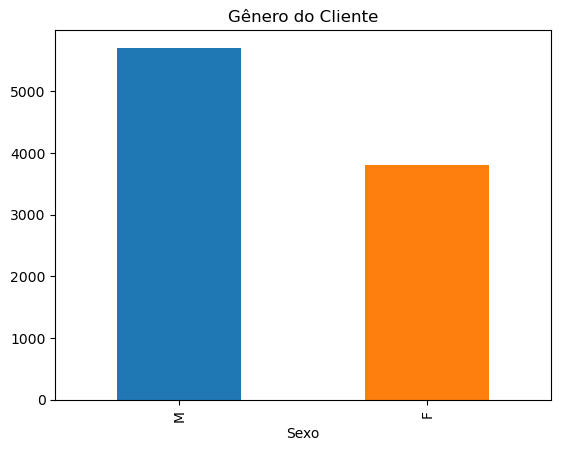

In [31]:
# Gráfico gênero dos clientes:
dados_original.Sexo.value_counts().plot(kind = "bar", title = "Gênero do Cliente", color = ["#1f77b4", "#ff7f0e"]);

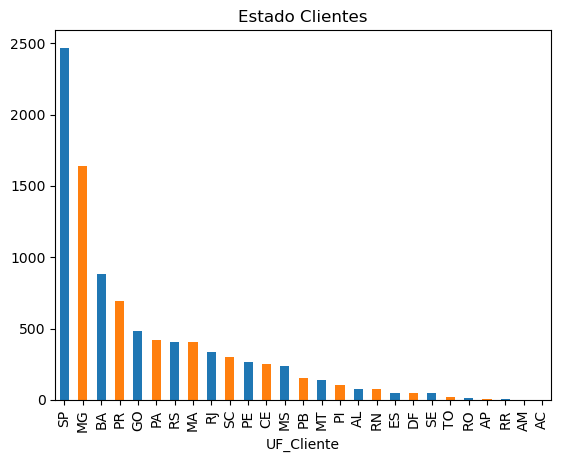

In [32]:
#Gráfico estado dos clientes:
dados_original.UF_Cliente.value_counts().plot(kind = "bar", title = "Estado Clientes", color = ["#1f77b4", "#ff7f0e"]);

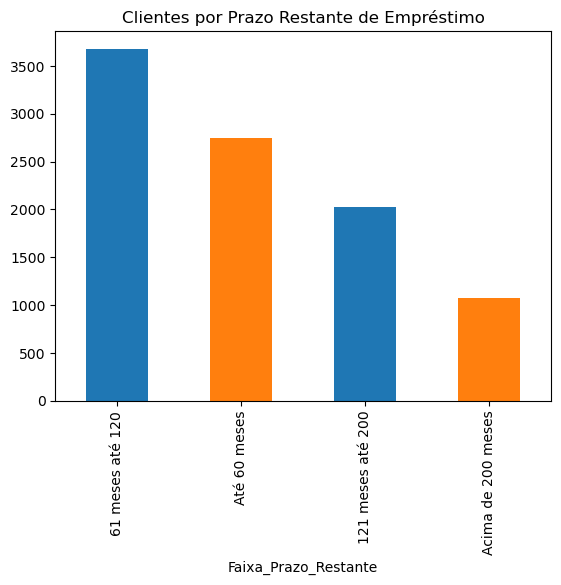

In [33]:
#Gráfico Prazo Restante de Empréstimos:
dados_original.Faixa_Prazo_Restante.value_counts().plot( kind = "bar", title = "Clientes por Prazo Restante de Empréstimo", color = ["#1f77b4", "#ff7f0e"]);

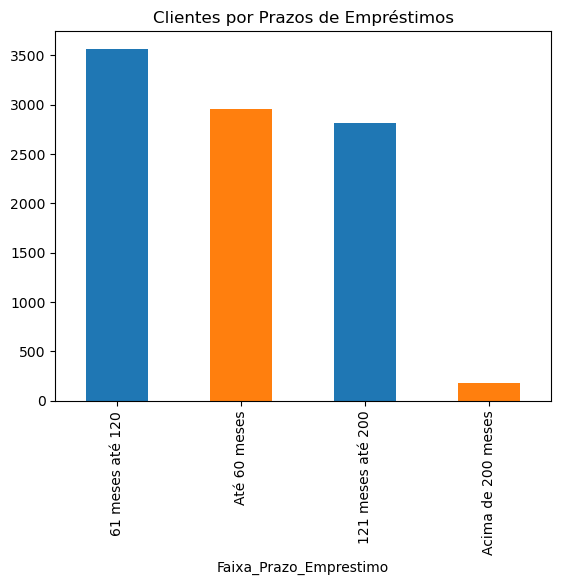

In [34]:
#Gráfico de clientes por Prazo de Empréstimos:
dados_original.Faixa_Prazo_Emprestimo.value_counts().plot(kind = "bar", title = "Clientes por Prazos de Empréstimos", color = ["#1f77b4", "#ff7f0e"]);

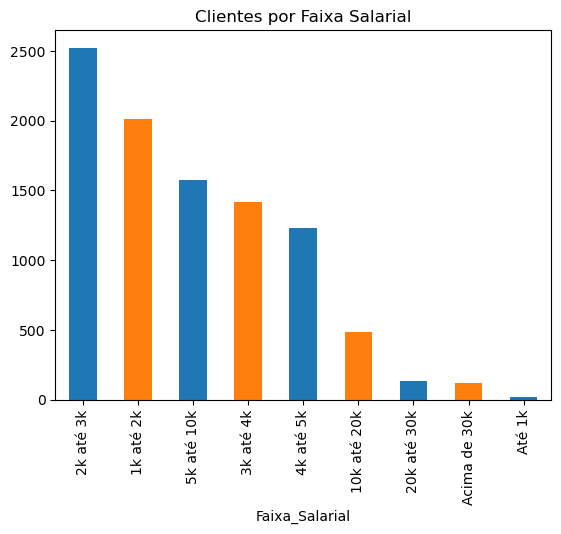

In [35]:
#Gráfico de clientes por faixa Salarial:
dados_original.Faixa_Salarial.value_counts().plot(kind = "bar", title = "Clientes por Faixa Salarial", color = ["#1f77b4", "#ff7f0e"]);

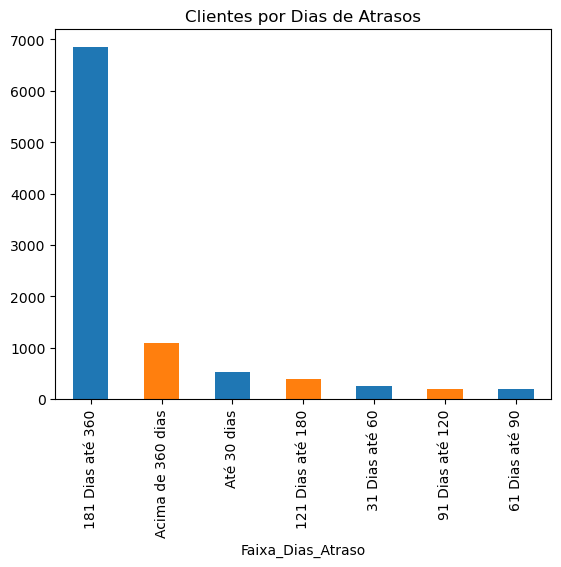

In [36]:
#Gráfico de clientes por Dias de Atrasos:
dados_original.Faixa_Dias_Atraso.value_counts().plot(kind = "bar", title = "Clientes por Dias de Atrasos", color = ["#1f77b4", "#ff7f0e"]);

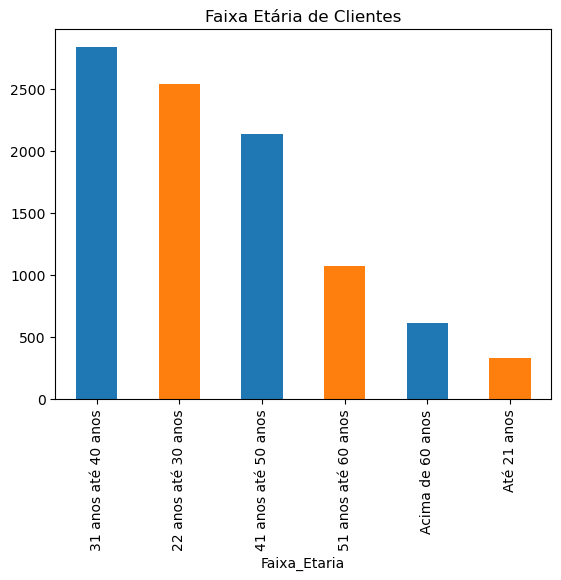

In [37]:
# Gráfico de clientes por Faixa Etária:
dados_original.Faixa_Etaria.value_counts().plot(kind = "bar", title = "Faixa Etária de Clientes", color = ["#1f77b4", "#ff7f0e"]);

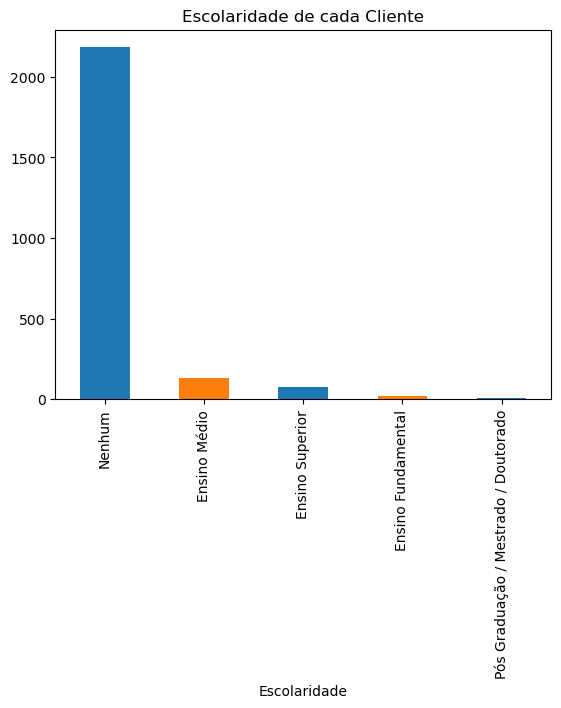

In [38]:
#Gráfico por escolaridade:;
dados_original.Escolaridade.value_counts().plot(kind = "bar", title = "Escolaridade de cada Cliente", color = ["#1f77b4", "#ff7f0e"]);

<Axes: title={'center': 'Estado Civil dos CLientes'}, xlabel='Estado_Civil'>

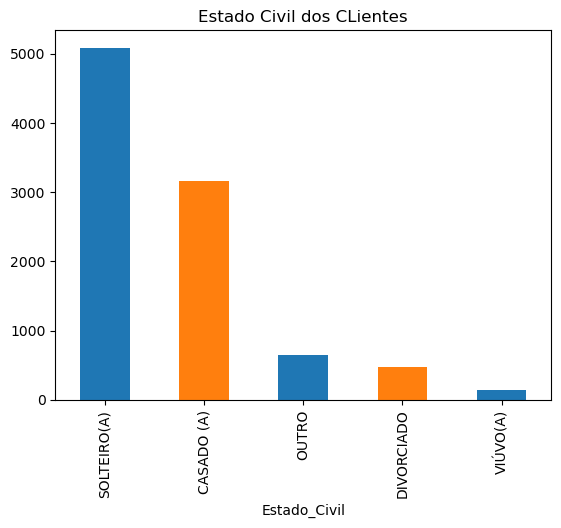

In [39]:
#Gráfico por Estado Civil dos clientes:
dados_original.Estado_Civil.value_counts().plot(kind = "bar", title = "Estado Civil dos CLientes", color = ["#1f77b4", "#ff7f0e"])

<Axes: title={'center': 'Quantidade de clientes que renegociaram'}, xlabel='Qt_Renegociacao'>

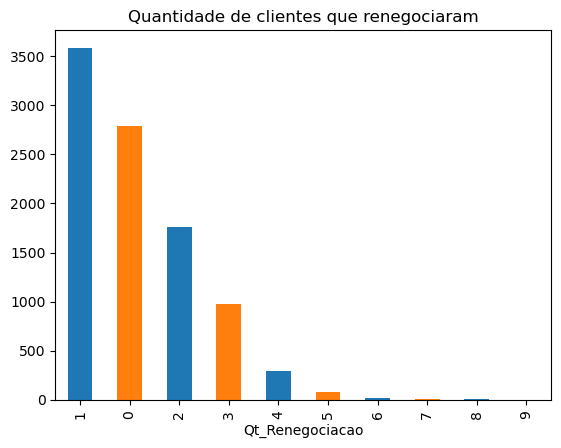

In [40]:
#Gráfico por Quantidade de clientes que renegociaram:
dados_original.Qt_Renegociacao.value_counts().plot(kind = "bar", title = "Quantidade de clientes que renegociaram", color = ["#1f77b4", "#ff7f0e"])

<Axes: title={'center': 'Possíveis Fraudes'}, xlabel='Possivel_Fraude'>

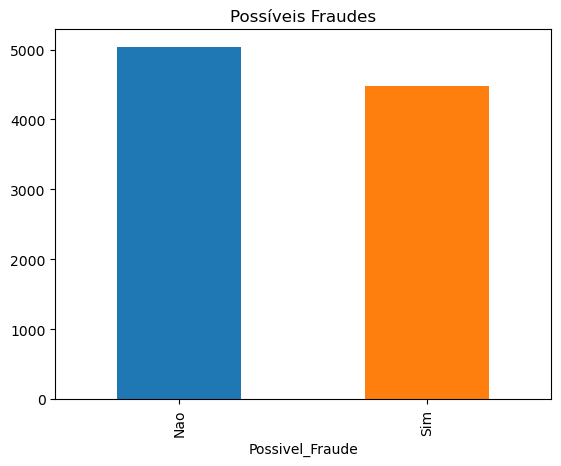

In [41]:
#Gráfico por Quantidade de possíveis fraudes
dados_original.Possivel_Fraude.value_counts().plot(kind = "bar", title = "Possíveis Fraudes", color = ["#1f77b4", "#ff7f0e"])

# DROPANDO AS COLUNAS QUE NÃO SERÃO UTILIZADAS NO MODELO

In [42]:
colunas = ["Sexo", "UF_Cliente", "Perc_Juros", "VL_Emprestimo", "VL_Emprestimo_ComJuros", "QT_Total_Parcelas_Pagas",
           "QT_Total_Parcelas_Pagas_EmDia", "QT_Total_Parcelas_Pagas_EmAtraso", "Qt_Renegociacao", "Estado_Civil", 
           "QT_Parcelas_Atraso", "Saldo_Devedor", "Total_Pago", "Faixa_Prazo_Restante", "Faixa_Salarial", 
           "Faixa_Prazo_Emprestimo", "Faixa_Etaria", "Faixa_Dias_Atraso", "Possivel_Fraude"]

new_Data = pd.DataFrame(dados_original, columns = colunas)

In [43]:
new_Data.shape

(9517, 19)

In [44]:
new_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9517 entries, 0 to 9516
Data columns (total 19 columns):
 #   Column                            Non-Null Count  Dtype   
---  ------                            --------------  -----   
 0   Sexo                              9517 non-null   object  
 1   UF_Cliente                        9517 non-null   object  
 2   Perc_Juros                        9517 non-null   float64 
 3   VL_Emprestimo                     9517 non-null   float64 
 4   VL_Emprestimo_ComJuros            9517 non-null   float64 
 5   QT_Total_Parcelas_Pagas           9517 non-null   int64   
 6   QT_Total_Parcelas_Pagas_EmDia     9517 non-null   int64   
 7   QT_Total_Parcelas_Pagas_EmAtraso  9517 non-null   int64   
 8   Qt_Renegociacao                   9517 non-null   int64   
 9   Estado_Civil                      9517 non-null   object  
 10  QT_Parcelas_Atraso                9517 non-null   int64   
 11  Saldo_Devedor                     9517 non-null   float6

In [45]:
new_Data.isnull().sum()

Sexo                                0
UF_Cliente                          0
Perc_Juros                          0
VL_Emprestimo                       0
VL_Emprestimo_ComJuros              0
QT_Total_Parcelas_Pagas             0
QT_Total_Parcelas_Pagas_EmDia       0
QT_Total_Parcelas_Pagas_EmAtraso    0
Qt_Renegociacao                     0
Estado_Civil                        0
QT_Parcelas_Atraso                  0
Saldo_Devedor                       0
Total_Pago                          0
Faixa_Prazo_Restante                0
Faixa_Salarial                      0
Faixa_Prazo_Emprestimo              0
Faixa_Etaria                        0
Faixa_Dias_Atraso                   0
Possivel_Fraude                     0
dtype: int64

## Vamos verificar possíveis fraudes por cada tabela

In [46]:
#Ajustando a exibição dos gráficos.
plt.rcParams["figure.figsize"] = [10.00, 4.00]
plt.rcParams["figure.autolayout"] = True

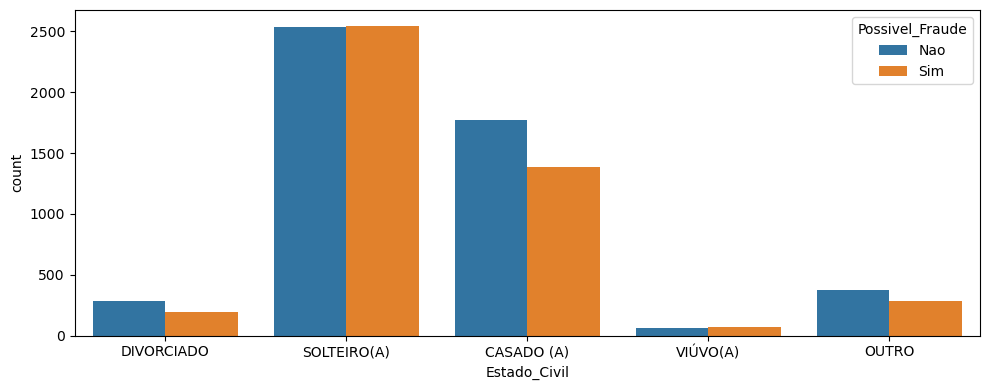

In [47]:
#Gráfico de barra -> Possíveis fraudes por estado civil.
sbn.countplot(data = new_Data, x = "Estado_Civil", hue = "Possivel_Fraude")
plt.show()

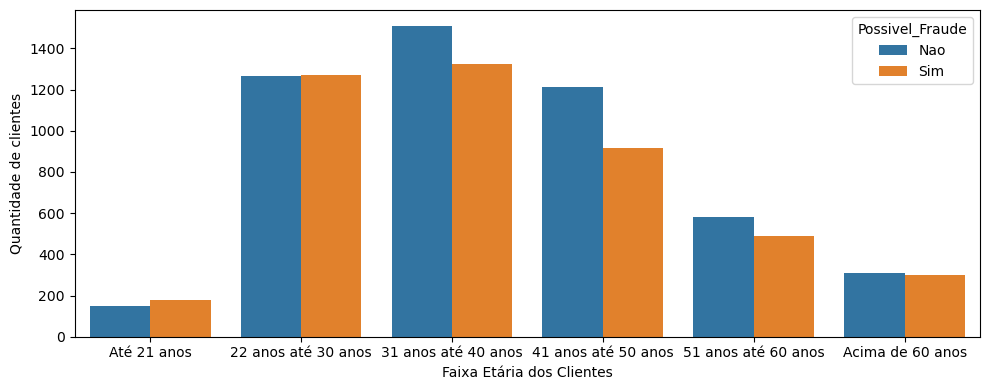

In [48]:
#Gráfico de barra -> Possiveis Fraudes por Faixa Etária
g = sbn.countplot(data = new_Data, x = "Faixa_Etaria", hue = "Possivel_Fraude")
g.set_ylabel("Quantidade de clientes", fontsize = 10)
g.set_xlabel("Faixa Etária dos Clientes", fontsize = 10)
plt.show()

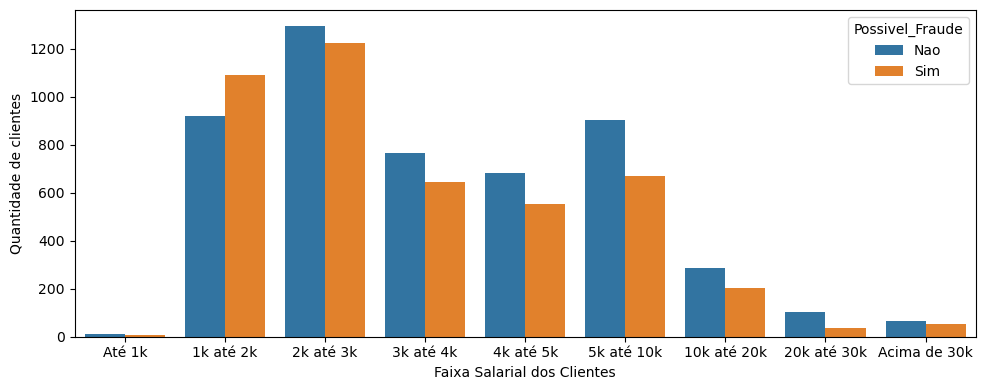

In [49]:
g = sbn.countplot(data = new_Data, x = "Faixa_Salarial", hue = "Possivel_Fraude")
g.set_ylabel("Quantidade de clientes", fontsize = 10)
g.set_xlabel("Faixa Salarial dos Clientes", fontsize = 10)
plt.show()

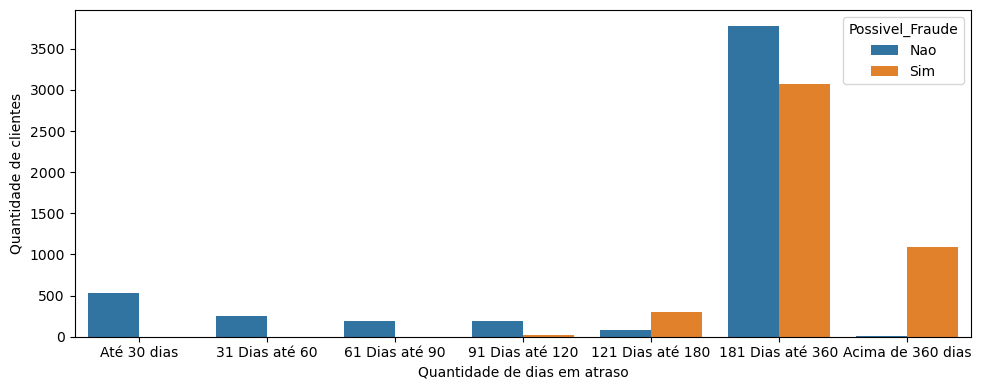

In [50]:
#Gráfico de barra -> Possíveis fraudes por Dias em Atraso
g = sbn.countplot(data = new_Data, x = "Faixa_Dias_Atraso", hue = "Possivel_Fraude")
g.set_ylabel("Quantidade de clientes", fontsize = 10)
g.set_xlabel("Quantidade de dias em atraso", fontsize = 10)
plt.show()

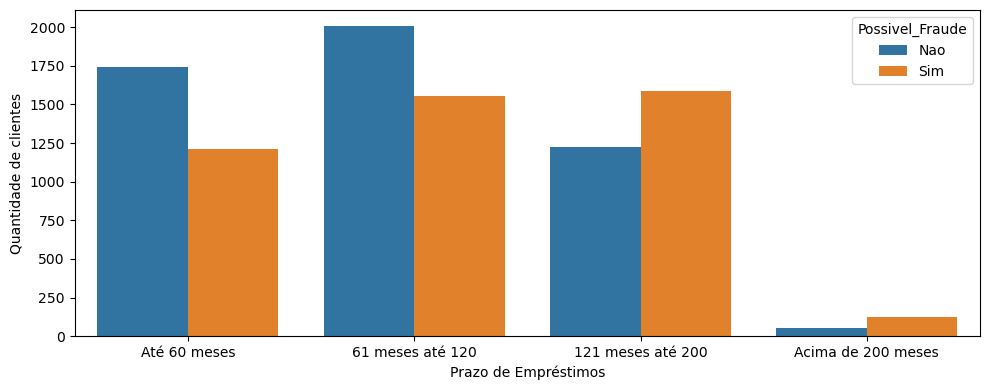

In [51]:
#Gráfico de barra -> Possíveis fraudes por Prazo de Empréstimo
g = sbn.countplot(data = new_Data, x = "Faixa_Prazo_Emprestimo", hue = "Possivel_Fraude")
g.set_ylabel("Quantidade de clientes", fontsize = 10)
g.set_xlabel("Prazo de Empréstimos", fontsize = 10)
plt.show()

# Tratando as tabelas de tipos numéricos

In [52]:
new_Data.describe()

,Perc_Juros,VL_Emprestimo,VL_Emprestimo_ComJuros,QT_Total_Parcelas_Pagas,QT_Total_Parcelas_Pagas_EmDia,QT_Total_Parcelas_Pagas_EmAtraso,Qt_Renegociacao,QT_Parcelas_Atraso,Saldo_Devedor,Total_Pago
count,9517.00,9517.00,9517.00,9517.00,9517.00,9517.00,9517.00,9517.00,9517.00,9517.00
mean,19.65,81881.89,94164.17,7.89,4.11,1.60,1.24,5.35,90560.27,8166.21
std,3.82,94138.06,108258.77,5.17,4.04,2.31,1.17,5.32,111050.54,16697.76
min,7.00,3500.00,4025.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,18.00,20000.00,23000.00,2.00,1.00,0.00,0.00,0.00,18546.85,1202.04
50%,20.00,50000.00,57500.00,9.00,2.00,1.00,1.00,4.00,45375.30,3949.91
75%,22.00,100000.00,115000.00,13.00,6.00,2.00,2.00,11.00,119721.25,8302.01
max,28.00,500000.00,575000.00,35.00,35.00,14.00,9.00,15.00,625000.00,396385.00


In [53]:
#Criando uma vetor para armazenar os dados de cada tabela que possuímos no conjunto de dados.
valores_unicos = []

#laço de reptição para buscar os dados e adicionando na nossa variável.
#Convertemos os dados para string para poder ser exibido como texto.
for i in new_Data.columns[0:19].to_list():
    print(i, ":", len(new_Data[i].astype(str).value_counts()))
    valores_unicos.append(len(new_Data[i].astype(str).value_counts()))

Sexo : 2
UF_Cliente : 27
Perc_Juros : 21
VL_Emprestimo : 61
VL_Emprestimo_ComJuros : 61
QT_Total_Parcelas_Pagas : 24
QT_Total_Parcelas_Pagas_EmDia : 24
QT_Total_Parcelas_Pagas_EmAtraso : 15
Qt_Renegociacao : 10
Estado_Civil : 5
QT_Parcelas_Atraso : 16
Saldo_Devedor : 7654
Total_Pago : 7022
Faixa_Prazo_Restante : 4
Faixa_Salarial : 9
Faixa_Prazo_Emprestimo : 4
Faixa_Etaria : 6
Faixa_Dias_Atraso : 7
Possivel_Fraude : 2


In [54]:
#Variavél para guardar valores numéricos:
valores_numericos = []

#Resgatando valores numéricos e guardando dentro de uma variavél:
for i in new_Data.columns[0:19].to_list():
    if new_Data.dtypes[i] == "int64" or new_Data.dtypes[i] == "float64":
        valores_numericos.append(i)

In [55]:
valores_numericos

['Perc_Juros',
 'VL_Emprestimo',
 'VL_Emprestimo_ComJuros',
 'QT_Total_Parcelas_Pagas',
 'QT_Total_Parcelas_Pagas_EmDia',
 'QT_Total_Parcelas_Pagas_EmAtraso',
 'Qt_Renegociacao',
 'QT_Parcelas_Atraso',
 'Saldo_Devedor',
 'Total_Pago']

In [56]:
len(valores_numericos)

10

### Automatizando geração de boxplots

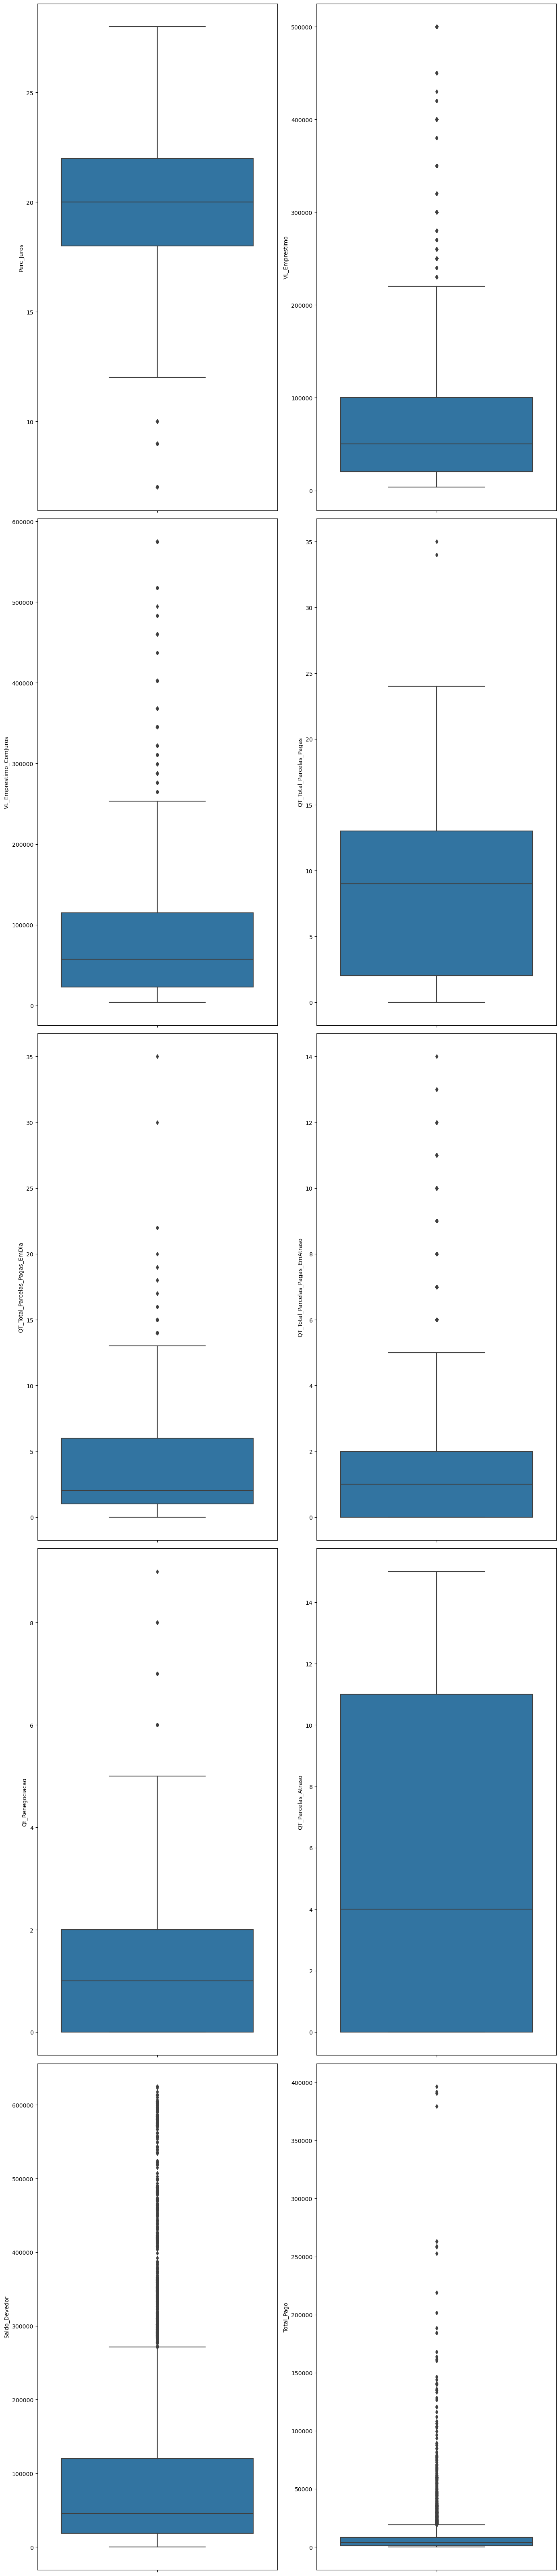

In [57]:
#Ajustando a exibição dos gráficos.
plt.rcParams["figure.figsize"] = [14.00, 64.00]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(5, 2) #-> 5 linhas e 2 colunas

#Definindo variáveis de colunas e linha de exibição de boxplots
linha = 0
coluna = 0

for i in valores_numericos:
    sbn.boxplot(data = new_Data, y = i, ax = axes[linha][coluna])
    coluna += 1
    
    if coluna == 2:
        linha += 1
        coluna = 0
        
plt.show()

In [58]:
#Variavél que irá guardar os dados buscados
valores_categoricos = []

#Laço de repetição para pegar cada valor categórico e object
for i in new_Data.columns[0:18].to_list():
    if new_Data.dtypes[i] == "object" or new_Data.dtypes[i] == "category":
        valores_categoricos.append(i)

In [59]:
valores_categoricos

['Sexo',
 'UF_Cliente',
 'Estado_Civil',
 'Faixa_Prazo_Restante',
 'Faixa_Salarial',
 'Faixa_Prazo_Emprestimo',
 'Faixa_Etaria',
 'Faixa_Dias_Atraso']

In [60]:
len(valores_categoricos)

8

## Realizando transformação de variaveis categóricas em variavéis numéricas

In [61]:
#Essa variavél recebeu um label encoder:
lb = LabelEncoder()

#->Esse laço de repetição passará por todas as tabelas que são categóricas e irão realizar a transformação para numéricos:
for var_cat in valores_categoricos:
    new_Data[var_cat] = lb.fit_transform(new_Data[var_cat])

In [62]:
new_Data.describe()

,Sexo,UF_Cliente,Perc_Juros,VL_Emprestimo,VL_Emprestimo_ComJuros,QT_Total_Parcelas_Pagas,QT_Total_Parcelas_Pagas_EmDia,QT_Total_Parcelas_Pagas_EmAtraso,Qt_Renegociacao,Estado_Civil,QT_Parcelas_Atraso,Saldo_Devedor,Total_Pago,Faixa_Prazo_Restante,Faixa_Salarial,Faixa_Prazo_Emprestimo,Faixa_Etaria,Faixa_Dias_Atraso
count,9517.00,9517.00,9517.00,9517.00,9517.00,9517.00,9517.00,9517.00,9517.00,9517.00,9517.00,9517.00,9517.00,9517.00,9517.00,9517.00,9517.00,9517.00
mean,0.60,15.30,19.65,81881.89,94164.17,7.89,4.11,1.60,1.24,1.85,5.35,90560.27,8166.21,1.48,3.37,1.34,1.51,1.83
std,0.49,7.53,3.82,94138.06,108258.77,5.17,4.04,2.31,1.17,1.40,5.32,111050.54,16697.76,1.12,1.89,1.20,1.34,1.70
min,0.00,0.00,7.00,3500.00,4025.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,10.00,18.00,20000.00,23000.00,2.00,1.00,0.00,0.00,0.00,0.00,18546.85,1202.04,1.00,1.00,0.00,0.00,1.00
50%,1.00,14.00,20.00,50000.00,57500.00,9.00,2.00,1.00,1.00,3.00,4.00,45375.30,3949.91,1.00,3.00,1.00,1.00,1.00
75%,1.00,25.00,22.00,100000.00,115000.00,13.00,6.00,2.00,2.00,3.00,11.00,119721.25,8302.01,3.00,5.00,3.00,2.00,1.00
max,1.00,26.00,28.00,500000.00,575000.00,35.00,35.00,14.00,9.00,4.00,15.00,625000.00,396385.00,3.00,8.00,3.00,5.00,6.00


In [63]:
new_Data.head()

,Sexo,UF_Cliente,Perc_Juros,VL_Emprestimo,VL_Emprestimo_ComJuros,QT_Total_Parcelas_Pagas,QT_Total_Parcelas_Pagas_EmDia,QT_Total_Parcelas_Pagas_EmAtraso,Qt_Renegociacao,Estado_Civil,QT_Parcelas_Atraso,Saldo_Devedor,Total_Pago,Faixa_Prazo_Restante,Faixa_Salarial,Faixa_Prazo_Emprestimo,Faixa_Etaria,Faixa_Dias_Atraso,Possivel_Fraude
0,1,25,23.00,80000.00,92000.00,15,9,1,0,1,0,91759.97,7717.08,0,6,0,2,1,Nao
1,1,10,20.00,50000.00,57500.00,10,10,0,0,3,4,53981.18,6756.59,1,1,1,0,4,Nao
2,1,4,18.00,100000.00,115000.00,15,5,1,0,0,0,101150.02,17929.06,1,4,1,1,1,Nao
3,1,10,20.00,30000.00,34500.00,1,1,0,0,3,13,36208.10,369.10,1,1,1,5,5,Sim
4,1,10,20.00,60000.00,69000.00,16,16,0,0,0,0,60984.00,11845.24,1,3,1,3,1,Nao


## Iniciando a criação do modeo e balanceamento de variáveis

In [64]:
#Atribuindo as variáveis que serão previstas e a variavel que define se é fraude ou não
preditora = new_Data.iloc[:, 0:18]
alvo = new_Data.iloc[:, 18]

In [65]:
preditora.head()

,Sexo,UF_Cliente,Perc_Juros,VL_Emprestimo,VL_Emprestimo_ComJuros,QT_Total_Parcelas_Pagas,QT_Total_Parcelas_Pagas_EmDia,QT_Total_Parcelas_Pagas_EmAtraso,Qt_Renegociacao,Estado_Civil,QT_Parcelas_Atraso,Saldo_Devedor,Total_Pago,Faixa_Prazo_Restante,Faixa_Salarial,Faixa_Prazo_Emprestimo,Faixa_Etaria,Faixa_Dias_Atraso
0,1,25,23.00,80000.00,92000.00,15,9,1,0,1,0,91759.97,7717.08,0,6,0,2,1
1,1,10,20.00,50000.00,57500.00,10,10,0,0,3,4,53981.18,6756.59,1,1,1,0,4
2,1,4,18.00,100000.00,115000.00,15,5,1,0,0,0,101150.02,17929.06,1,4,1,1,1
3,1,10,20.00,30000.00,34500.00,1,1,0,0,3,13,36208.10,369.10,1,1,1,5,5
4,1,10,20.00,60000.00,69000.00,16,16,0,0,0,0,60984.00,11845.24,1,3,1,3,1


In [66]:
alvo.head()

0    Nao
1    Nao
2    Nao
3    Sim
4    Nao
Name: Possivel_Fraude, dtype: object

In [67]:
# Criando semente para realizar o balanceamento, pode ser qualuqer número ex: 110, 150, 180...
semente = 100

#Criando o balanceador
balanceador = SMOTE(random_state = semente)

#Aplicando o balanceamento na varivél alvo e preditora
preditora_res, alvo_res = balanceador.fit_resample(preditora, alvo)

In [68]:
preditora_res.shape

(10070, 18)

In [69]:
alvo_res.shape

(10070,)

# TREINOS E TESTES DO MODELO

In [70]:
x_treino, x_teste, y_treino, y_teste = train_test_split(preditora_res, alvo_res, test_size = 0.3, random_state = 40)

In [71]:
x_treino.shape

(7049, 18)

# Normalizando os dados

In [72]:
normalizador = MinMaxScaler()

x_treino_normal = normalizador.fit_transform(x_treino)

x_teste_normal = normalizador.transform(x_teste)

In [73]:
x_treino_normal.shape

(7049, 18)

In [74]:
x_teste_normal.shape

(3021, 18)

# Padronizando os dados

In [75]:
padronizador = StandardScaler()

x_treino_padronizado = padronizador.fit_transform(x_treino)

x_teste_padronizado = padronizador.transform(x_teste)

In [76]:
x_treino_padronizado

array([[-1.19892183,  1.03739242,  1.14288186, ...,  0.55690337,
        -0.37892901, -0.49502017],
       [-1.19892183, -1.50174397, -0.16177751, ..., -1.11820303,
         0.36927004, -0.49502017],
       [ 0.83408274,  0.36919863,  0.09915436, ..., -1.11820303,
         0.36927004, -0.49502017],
       ...,
       [-1.19892183, -1.1008277 ,  0.88194999, ...,  1.39445657,
        -0.37892901, -0.49502017],
       [-1.19892183, -0.96718894, -0.42270939, ..., -0.28064983,
         1.11746908, -0.49502017],
       [ 0.83408274, -0.1653564 , -0.94457313, ...,  1.39445657,
         1.11746908, -0.49502017]])

## Criando treinamento dos modelos (Treino Padronizado e Treino Normalizado)

# MODELO RANDOM FOREST CLASSIFIER

In [77]:
randomForest = RandomForestClassifier()

In [78]:
randomForest.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [79]:
# Criando dicionário com parâmetros
n_estimators = np.array([100, 200, 300])
max_depth = np.array([10, 20])
criterion = np.array(["gini", "entropy"])
max_features = np.array(["sqrt", "log2", None])
min_samples_split = np.array([1, 2, 5])
min_samples_leaf = np.array([1, 2, 3])

grid_parametros = dict(n_estimators = n_estimators, max_depth = max_depth,
                       criterion = criterion, max_features = max_features,
                       min_samples_leaf = min_samples_leaf, min_samples_split = min_samples_split)

randomForest = GridSearchCV(randomForest, grid_parametros, cv = 3, n_jobs = 6)

# Treinando o modelo
inicio = time.time()
randomForest.fit(x_treino_normal, y_treino)
fim = time.time()

# Obtendo e visualizando os modelos treinados
treinos_rf = pd.DataFrame(randomForest.cv_results_)

#Exibindo o treino realizado e a acurácia
print(f"Acurácia em treinamento: {randomForest.best_score_:.2%}")
print("")
print(f"Hiper-Parâmetros ideais: {randomForest.best_params_}")
print("")
print(f"Tempo de treinamento do modelo: ", round(fim - inicio, 2))
print("")
print(f"Número de treinamentos realizados: ", treinos_rf.shape[0])

Acurácia em treinamento: 99.12%

Hiper-Parâmetros ideais: {'criterion': 'entropy', 'max_depth': 20, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}

Tempo de treinamento do modelo:  327.07

Número de treinamentos realizados:  324


# Criação do classificador

In [80]:
classificador = RandomForestClassifier(n_estimators = 100, criterion = "entropy",
                                       max_depth = 20, max_features = "sqrt", 
                                       min_samples_split = 2, min_samples_leaf = 1)

classificador = classificador.fit(x_treino_normal, y_treino)

Text(0.5, 1.0, 'Importancia de cada Tabela')

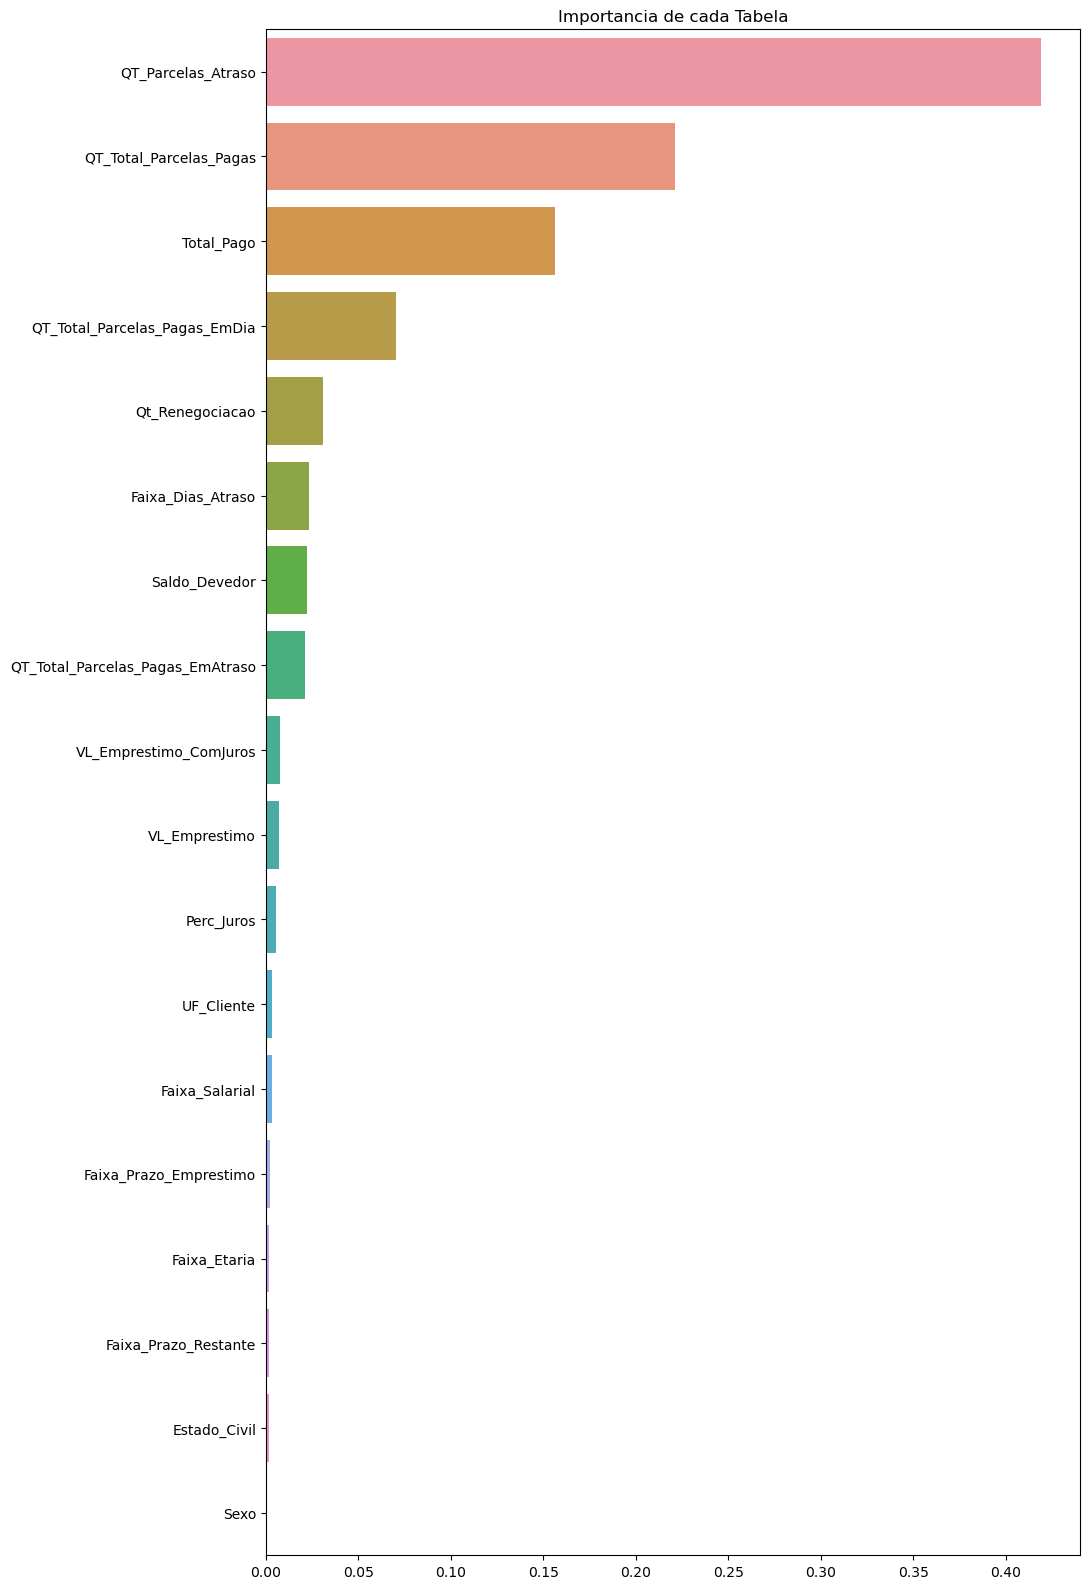

In [81]:

plt.rcParams["figure.figsize"] = [11.00, 16.00]
plt.rcParams["figure.autolayout"] = True

importances = pd.Series(data = classificador.feature_importances_, index = preditora_res.columns)

importances = importances.sort_values(ascending = False)

sbn.barplot(x = importances, y = importances.index, orient = "h").set_title("Importancia de cada Tabela")

## Verificando a pontuação das vairavéis teste e treino e comparando entre si:

In [82]:
pontuacao = classificador.score(x_treino_normal, y_treino)
pontuacao

1.0

In [83]:
pontuacao = classificador.score(x_teste_normal, y_teste)
pontuacao

0.9920556107249255

## Criando dicionário de métricas e metadados

In [84]:
modelo_rf = {"Melhores Hiper-Parâmetros" : randomForest.best_params_,
             "Número de modelos treinados" : treinos_rf.shape[0], 
             "Melhor pontuação" : str(round(randomForest.best_score_ * 100, 2)) + "%"}

# MODELO SVM

## Criando modelo

In [85]:
#Construtor do modelo
modelo_svm = SVC()

In [86]:
#Parâmetros padrões
modelo_svm.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [87]:
grid_parametros = {"C" : [0.1,1,10,100], 
                   "gamma" : [1,0.1,0.01,0.001],
                   #"kernel" : ["poly", "rbf", "sigmoid", "linear"],
                   "degree" : [2,3,4],
                   "coef0" : [0,5,1], 
                   #"decision_function_shape" : ["ovo", "ovr"],
                   "max_iter" : [-1,1]}

svm = GridSearchCV(modelo_svm, grid_parametros, n_jobs = 6)

inicio = time.time()
svm.fit(x_treino_normal, y_treino)
fim = time.time()

treinos_svm = pd.DataFrame(svm.cv_results_)

print(f"Acurácia em treinamento: {svm.best_score_:.2%}")
print("")
print(f"Hiper-Parâmetros Ideais: {svm.best_params_}")
print("")
print("Tempo de treinamento do modelo: ", round(fim - inicio, 2))
print("")
print("Número de treinamentos realizados: ", treinos_svm.shape[0])


Acurácia em treinamento: 99.05%

Hiper-Parâmetros Ideais: {'C': 100, 'coef0': 0, 'degree': 2, 'gamma': 0.1, 'max_iter': -1}

Tempo de treinamento do modelo:  154.36

Número de treinamentos realizados:  288


## Criando dicionário de métricas e metadados

In [106]:
modelo_smv = {"Melhores Hiper-Parâmetros" : svm.best_params_,
             "Número de modelos treinados" : treinos_svm.shape[0], 
             "Melhor pontuação" : str(round(svm.best_score_ * 100, 2)) + "%"}

# MODELO KNN

## Criando classificador

In [89]:
knn = KNeighborsClassifier()

In [90]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [91]:
n_neighbors = np.array([3,4,5,6,7])
algorithm = np.array(['auto', 'ball_tree', 'kd_tree', 'brute'])
leaf_size = np.array([30,31,32])
metric =  np.array(['minkowski','euclidean'])

grid_parametros = dict(n_neighbors = n_neighbors,
                       algorithm = algorithm,
                       leaf_size = leaf_size,
                       metric = metric)

knn = GridSearchCV(knn, grid_parametros, n_jobs = 8)

inicio = time.time()
knn.fit(x_treino_normal, y_treino)
fim = time.time()

treinos_knn = pd.DataFrame(knn.cv_results_)

print(f"Acurácia de treinamento {knn.best_score_:.2%}")
print("")
print(f"Melhores Parâmetros {knn.best_params_}")
print("")
print("Tempo de treinamento ", round(fim - inicio, 2))
print("")
print("Quantidade de modelos treinados ", treinos_knn.shape[0])

Acurácia de treinamento 98.34%

Melhores Parâmetros {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'n_neighbors': 6}

Tempo de treinamento  25.38

Quantidade de modelos treinados  120


In [114]:
modelo_knn = {"Melhores Hiper-Parâmetros": knn.best_params_,
              "Número de modelos treinados" : treinos_knn.shape[0],
              "Melhor pontuação" : str(round(knn.best_score_ * 100, 2)) + "%"
              }

In [93]:
modelo_knn

{'Melhores Hiper-Parâmetros': {'algorithm': 'auto',
  'leaf_size': 30,
  'metric': 'minkowski',
  'n_neighbors': 6},
 'Melhor pontuação': '98.34',
 'Quantidade de modelos treinados': 120}

# Criando dicionário com dados de treinamento:

In [115]:
resumo = pd.DataFrame({"Random Forest" : pd.Series(modelo_rf),
                       "SVM" : pd.Series(modelo_smv),
                       "KNN" : pd.Series(modelo_knn)
                       })

In [120]:
resumo

,Random Forest,SVM,KNN
Melhores Hiper-Parâmetros,"{'criterion': 'entropy', 'max_depth': 20, 'max...","{'C': 100, 'coef0': 0, 'degree': 2, 'gamma': 0...","{'algorithm': 'auto', 'leaf_size': 30, 'metric..."
Número de modelos treinados,324,288,120
Melhor pontuação,99.12%,99.05%,98.34%
